In [1]:
from math import pi
import numpy as np

# display result of assignments
%config ZMQInteractiveShell.ast_node_interactivity = 'last_expr_or_assign'
# make NumPy display a bit nicer
np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:10.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})
# make cells nice and wide
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))
%matplotlib notebook


In [2]:
import sympy as sp
import spatialmath.base.symbolic as sym
from roboticstoolbox import DHRobot, RevoluteDH, ERobot, ELink, ETS
from math import pi, sin, cos
import numpy as np

In [3]:
rC1=np.array([-240.46, -2.28, -139.25])/1000
rC2=np.array([-0.01, 213.35, 146.34])/1000
rC3=np.array([-37.92, 56.60, 29.73])/1000
rC4=np.array([-10.80, 0.36, 59.50])/1000
rC5=np.array([13.60, -114.15, -99.62])/1000

I1=np.array([16276348.15, 59567274.21, 72097187.65,0,0,0])/1e9
I2=np.array([13060964.16, 43498149.19, 7849056.42,0, 0, 0])/1e9
I3=np.array([8488723.47, 15197458.26, 17151274.34,0, 0, 0])/1e9
I4=np.array([998622.53, 2297521.13, 2606582.33,0, 0, 0])/1e9
I5=np.array([2680533.00, 10713275.00, 11512705.79,0, 0, 0])/1e9

m1=8491.07/1000;
m2=4423.53/1000;
m3=1970.11/1000;
m4=464.63/1000;
m5=1401.88/1000

d1=210/1000; d3=336/1000; d5=240/1000;

# T01=DH(q1,d1,0,90);
# T12=DH(q2-pi/2,0,0,-90);
# T23=DH(q3,d3,0,90);
# T34=DH(q4,0,0,-90);
# T45=DH(q5,d5,0,90);


# d1=125.5
a1=0
alpha1=pi/2

d2=0
a2=0
alpha2=-pi/2

# d3=340
a3=0
alpha3=pi/2

d4=0
a4=0
alpha4=-pi/2

# d5=270
a5=0
alpha5=pi/2

L1 = RevoluteDH(a=a1, d=d1, alpha=alpha1, m=m1, I=I1, r=rC1)
L2 = RevoluteDH(a=a2, d=d2, alpha=alpha2, m=m2, I=I2, r=rC2)
L3 = RevoluteDH(a=a3, d=d3, alpha=alpha3, m=m3, I=I3, r=rC3)
L4 = RevoluteDH(a=a4, d=d4, alpha=alpha4, m=m4, I=I4, r=rC4)
L5 = RevoluteDH(a=a5, d=d5, alpha=alpha5, m=m5, I=I5, r=rC5)

robot = DHRobot([L1, L2, L3, L4, L5],name='Huy',gravity=[0,0,9.81])

DHRobot: Huy, 5 joints (RRRRR), dynamics, standard DH parameters
┏━━━━┳━━━━━━━┳━━━━┳━━━━━━━━┓
┃θⱼ  ┃  dⱼ   ┃ aⱼ ┃   ⍺ⱼ   ┃
┣━━━━╋━━━━━━━╋━━━━╋━━━━━━━━┫
┃ q1 ┃  0.21 ┃  0 ┃  90.0° ┃
┃ q2 ┃     0 ┃  0 ┃ -90.0° ┃
┃ q3 ┃ 0.336 ┃  0 ┃  90.0° ┃
┃ q4 ┃     0 ┃  0 ┃ -90.0° ┃
┃ q5 ┃  0.24 ┃  0 ┃  90.0° ┃
┗━━━━┻━━━━━━━┻━━━━┻━━━━━━━━┛

In [4]:
tau = robot.rne(np.array([[1,1-pi/2,1,1,1],[1,1-pi/2,1,1,1]]), np.ones((2,5)),np.ones((2,5)))
tau

array([[ 0.98934735, -9.15462467,  1.52001866,  1.93937398,  1.12583064],
       [ 0.98934735, -9.15462467,  1.52001866,  1.93937398,  1.12583064]])

In [5]:
np.ones((5,))

array([1., 1., 1., 1., 1.])

In [6]:
print(robot)

DHRobot: Huy, 5 joints (RRRRR), dynamics, standard DH parameters
┏━━━━┳━━━━━━━┳━━━━┳━━━━━━━━┓
┃θⱼ  ┃  dⱼ   ┃ aⱼ ┃   ⍺ⱼ   ┃
┣━━━━╋━━━━━━━╋━━━━╋━━━━━━━━┫
┃ q1 ┃  0.21 ┃  0 ┃  90.0° ┃
┃ q2 ┃     0 ┃  0 ┃ -90.0° ┃
┃ q3 ┃ 0.336 ┃  0 ┃  90.0° ┃
┃ q4 ┃     0 ┃  0 ┃ -90.0° ┃
┃ q5 ┃  0.24 ┃  0 ┃  90.0° ┃
┗━━━━┻━━━━━━━┻━━━━┻━━━━━━━━┛



In [7]:
q = sym.symbol('q_:5')
q=[0,pi/2,0,0,pi/2]
T=robot.fkine(q)
T.t

array([-5.76000000e-01, -3.52698278e-17,  2.10000000e-01])

In [8]:
qr=robot.qrandom

array([ 0.59646406,  0.21625043,  2.11504937,  1.34266142, -1.91416691])

In [9]:
T=robot.fkine(qr)

   0.5037    0.8355    0.2194    0.1409    
   0.8526   -0.44     -0.2819   -0.1461    
  -0.139     0.3291   -0.934     0.6172    
   0         0         0         1         


In [10]:
T.t

array([ 0.14087748, -0.14609664,  0.61716161])

In [11]:
sol = robot.ikine_LMS(T,q0=qr+pi/2*(np.random.rand(5)-0.5))

IKsolution(q=array([ 0.59640883,  0.21625047,  2.11510156,  1.34267179, -1.91416056]), success=True, reason=None, iterations=9, residual=7.807659997197535e-12)

In [12]:
robot.fkine(sol.q)

   0.5037    0.8355    0.2194    0.1409    
   0.8526   -0.44     -0.2819   -0.1461    
  -0.139     0.3291   -0.934     0.6172    
   0         0         0         1         


In [13]:
q_do=np.loadtxt("./Data/data/danh_bong/q_1.txt")/180*pi

array([[-6.14990568e-01,  1.22637309e-01,  6.86123836e-01,  8.81880924e-01,  0.00000000e+00],
       [-6.03389155e-01,  1.22637309e-01,  6.86123836e-01,  8.81880924e-01,  0.00000000e+00],
       [-6.09189862e-01,  1.16836606e-01,  6.86123836e-01,  8.81880924e-01,  0.00000000e+00],
       [-6.09189862e-01,  1.16836606e-01,  6.86123836e-01,  8.81880924e-01,  0.00000000e+00],
       [-6.03389155e-01,  1.11035903e-01,  6.86123836e-01,  8.76080218e-01,  0.00000000e+00],
       [-5.97588449e-01,  1.11035903e-01,  6.86490355e-01,  8.70279511e-01,  0.00000000e+00],
       [-6.03389155e-01,  1.57441528e-01,  6.83924721e-01,  8.41275996e-01,  0.00000000e+00],
       [-6.26591964e-01,  2.32850676e-01,  6.64132687e-01,  8.41275996e-01,  0.00000000e+00],
       [-6.55595479e-01,  3.25661928e-01,  6.42874577e-01,  8.35475290e-01,  0.00000000e+00],
       [-6.67196892e-01,  3.95270371e-01,  6.02923990e-01,  8.35475290e-01,  0.00000000e+00],
       [-6.72997598e-01,  4.41675988e-01,  5.84231514e-01,  

In [14]:
T=robot.fkine(q_do)
E_do=T.t

array([[-0.23273289,  0.02069389,  0.67736379],
       [-0.2329573 ,  0.01799253,  0.67736379],
       [-0.23062288,  0.01779034,  0.67852784],
       [-0.23062288,  0.01779034,  0.67852784],
       [-0.2276978 ,  0.01505141,  0.68081776],
       [-0.22698598,  0.01381151,  0.6819595 ],
       [-0.2409577 ,  0.02875851,  0.67808483],
       [-0.26841618,  0.0581641 ,  0.66006751],
       [-0.29808087,  0.09463539,  0.63529829],
       [-0.31907475,  0.12285591,  0.61222435],
       [-0.33226849,  0.13932128,  0.59584184],
       [-0.34108296,  0.15611305,  0.58051613],
       [-0.34928206,  0.17115229,  0.56496587],
       [-0.36000401,  0.1821647 ,  0.54734571],
       [-0.36995936,  0.19031568,  0.52838527],
       [-0.37713194,  0.2047006 ,  0.50570204],
       [-0.37873162,  0.21925238,  0.48903228],
       [-0.38618211,  0.22282484,  0.4685422 ],
       [-0.39415514,  0.2226939 ,  0.44185185],
       [-0.38672312,  0.2393954 ,  0.42136544],
       [-0.38624159,  0.24205608,  0.398

In [15]:
T[0]

   0.5539   -0.8298    0.06719  -0.2327    
   0.1018   -0.01259  -0.9947    0.02069   
   0.8263    0.5579    0.0775    0.6774    
   0         0         0         1         


In [16]:
import matplotlib.pyplot as plt
def plotE(E):
    fig = plt.figure()

    ax = fig.add_subplot(111, projection='3d')

    ax.plot(E[:,0],E[:,1],E[:,2])

<IPython.core.display.Javascript object>


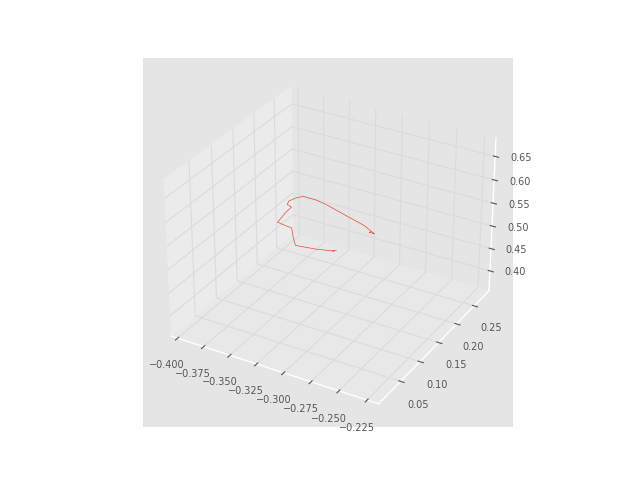

In [17]:
plotE(E_do)

In [18]:
ik=robot.ikine_min(T,q0=q_do[0,:])
len(ik)

30

In [19]:
q_ik=np.array([t.q for t in ik])
q_ik.shape

(30, 5)

In [20]:
T=robot.fkine(q_do)
E_do=T.t
R_do=T.rpy()
# np.concatenate((E_do, R_do), axis=1)

array([[ 1.43275461, -0.97251689,  0.18173513],
       [ 1.43275461, -0.97251689,  0.19333655],
       [ 1.44007563, -0.96844937,  0.18149482],
       [ 1.44007563, -0.96844937,  0.18149482],
       [ 1.44832984, -0.95860021,  0.18009919],
       [ 1.44927906, -0.95281396,  0.18508159],
       [ 1.39802026, -0.95666508,  0.21612033],
       [ 1.30036976, -1.00934744,  0.25479699],
       [ 1.16438245, -1.06422478,  0.32151091],
       [ 1.05364523, -1.11337305,  0.37067532],
       [ 0.96726797, -1.14240246,  0.42585018],
       [ 0.9000771 , -1.17813602,  0.44734251],
       [ 0.82051493, -1.21025081,  0.48949324],
       [ 0.70338537, -1.23447242,  0.58911133],
       [ 0.5624312 , -1.26463686,  0.7140142 ],
       [ 0.37959912, -1.31464555,  0.84881413],
       [ 0.2077817 , -1.3576245 ,  0.96751441],
       [-0.08408581, -1.36863653,  1.2503627 ],
       [-0.50911339, -1.35937023,  1.66876215],
       [-0.95738726, -1.3525117 ,  2.04070118],
       [-1.25587918, -1.29811302,  2.308

In [21]:
from DMP.dmp_discrete import DMPs_discrete
from spatialmath import *
from math import sqrt

In [22]:
E_do=T.t
R_do=T.rpy()
ER_do=np.concatenate((E_do, R_do), axis=1)

array([[-0.23273289,  0.02069389,  0.67736379,  1.43275461, -0.97251689,  0.18173513],
       [-0.2329573 ,  0.01799253,  0.67736379,  1.43275461, -0.97251689,  0.19333655],
       [-0.23062288,  0.01779034,  0.67852784,  1.44007563, -0.96844937,  0.18149482],
       [-0.23062288,  0.01779034,  0.67852784,  1.44007563, -0.96844937,  0.18149482],
       [-0.2276978 ,  0.01505141,  0.68081776,  1.44832984, -0.95860021,  0.18009919],
       [-0.22698598,  0.01381151,  0.6819595 ,  1.44927906, -0.95281396,  0.18508159],
       [-0.2409577 ,  0.02875851,  0.67808483,  1.39802026, -0.95666508,  0.21612033],
       [-0.26841618,  0.0581641 ,  0.66006751,  1.30036976, -1.00934744,  0.25479699],
       [-0.29808087,  0.09463539,  0.63529829,  1.16438245, -1.06422478,  0.32151091],
       [-0.31907475,  0.12285591,  0.61222435,  1.05364523, -1.11337305,  0.37067532],
       [-0.33226849,  0.13932128,  0.59584184,  0.96726797, -1.14240246,  0.42585018],
       [-0.34108296,  0.15611305,  0.580516

In [63]:
from tqdm.auto import tqdm

In [64]:
def dmp_gen(robot, q_do, random_e, n):

    T=robot.fkine(q_do)
    E_do=T.t
    dmp_q=DMPs_discrete(n_dmps=5,n_bfs=10000, dt=1/50)
    # dmp cho q
    dmp_q.imitate_path(y_des=q_do.T)
    
    q_dmps=[]
    E_q_dmps= []
    for i in tqdm(range(n)):
        


        # omega_q = dmp_q.w
        dmp_q.y0=q_do[0,:]+np.random.rand(5)*random_e/5
        Te=robot.fkine(q_do[-1,:])
        dmp_q.goal=q_do.T[:,-1]+np.random.rand(5)*random_e
        q_track, dq_track, ddq_track = dmp_q.rollout()
        q_dmp = np.array(q_track)
        E_q_dmp=robot.fkine(q_dmp).t
        
        q_dmps.append(q_dmp)
        E_q_dmps.append(E_q_dmp)
    return np.array(q_do), np.array(q_dmps), np.array(E_do), np.array(E_q_dmps)
    

In [67]:
q_do, q_dmps, E_do, E_q_dmps=dmp_gen(robot, q_do, random_e=0.3, n=20000)

  0%|          | 0/20000 [00:00<?, ?it/s]

In [68]:
np.save('q_dmps.npy',q_dmps)
np.save('E_q_dmps.npy',E_q_dmps)

<IPython.core.display.Javascript object>


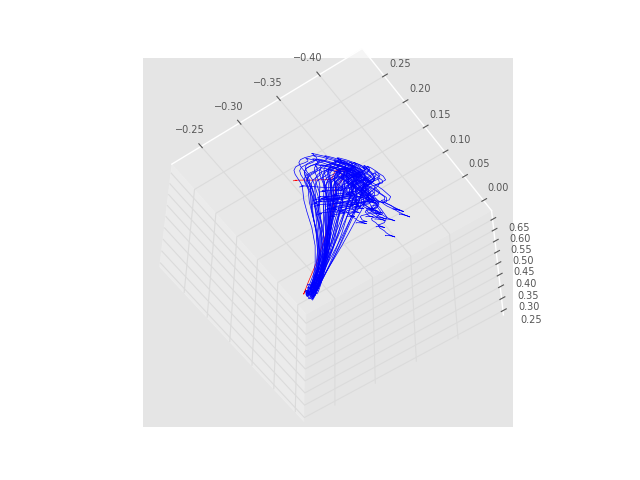

In [55]:
fig = plt.figure('E_gen')
ax = fig.add_subplot(111, projection='3d')
ax.plot(E_do[:,0],E_do[:,1],E_do[:,2],'r', label='E_do')
for i in range(len(E_q_dmps)):   
    ax.plot(E_q_dmps[i][:,0],E_q_dmps[i][:,1],E_q_dmps[i][:,2],'b', label='E_q_dmp')
# ax.legend()
# plt.show()

In [37]:
def rb_dmp(robot, q_do, random_e):
    T=robot.fkine(q_do)
    E_do=T.t

    dmp_e=DMPs_discrete(n_dmps=3,n_bfs=10000, dt=1/200)
    dmp_q=DMPs_discrete(n_dmps=5,n_bfs=10000, dt=1/200)

    # dmp cho toa do diem cuoi
    dmp_e.imitate_path(y_des=E_do.T)
    # omega_e = dmp_e.w
    dmp_e.y0=E_do.T[:,0]

    dmp_e.goal =E_do.T[:,-1]+np.random.rand(3)*random_e
        
    e_track, de_track, dde_track = dmp_e.rollout()
    E_dmp = np.array(e_track)
    

    # dmp cho q
    dmp_q.imitate_path(y_des=q_do.T)
    # omega_q = dmp_q.w
    dmp_q.y0=q_do[0,:]
    Te=robot.fkine(q_do[-1,:])
    dmp_q.goal=robot.ikine_min(SE3(dmp_e.goal) * SE3.RPY(Te.rpy()) ,q0=q_do[0,:]).q #q cuoi giai ik e_do cuoi
    q_track, dq_track, ddq_track = dmp_q.rollout()
    q_dmp = np.array(q_track)
    E_q_dmp=robot.fkine(q_dmp).t
    return q_do,q_ik_dmp, q_dmp, E_do, E_dmp, E_q_dmp


In [38]:
def rb_dmp_R(robot, q_do, random_e=0):
    T=robot.fkine(q_do)
    E_do=T.t
    R_do=T.rpy()
    ER_do=np.concatenate((E_do, R_do), axis=1)

    dmp_e=DMPs_discrete(n_dmps=6,n_bfs=10000, dt=1/200)
    dmp_q=DMPs_discrete(n_dmps=5,n_bfs=10000, dt=1/200)

    # dmp cho toa do diem cuoi
    dmp_e.imitate_path(y_des=ER_do.T)
    # omega_e = dmp_e.w
    dmp_e.y0=ER_do.T[:,0]

    dmp_e.goal =ER_do.T[:,-1]+np.random.rand(6)*random_e

    e_track, de_track, dde_track = dmp_e.rollout()
    E_dmp = np.array(e_track)
    q_ik_dmp= robot.ikine_min(SE3(E_dmp[:,:3]) * SE3.RPY(E_dmp[:,3:]))
    q_ik_dmp=np.array([t.q for t in q_ik_dmp])
    E_dmp = np.array(e_track[:,:3])
    # dmp cho q
    dmp_q.imitate_path(y_des=q_do.T)
    # omega_q = dmp_q.w
    dmp_q.y0=q_do[0,:]
    Te=robot.fkine(q_do[-1,:])
#     print(dmp_e.goal[:3].shape)
    dmp_q.goal=robot.ikine_min(SE3(dmp_e.goal[:3]) * SE3.RPY(Te.rpy()) ,q0=q_do[0,:]).q #q cuoi giai ik e_do cuoi
    q_track, dq_track, ddq_track = dmp_q.rollout()
    q_dmp = np.array(q_track)
    E_q_dmp=robot.fkine(q_dmp).t
    return q_do,q_ik_dmp, q_dmp, E_do, E_dmp, E_q_dmp


<IPython.core.display.Javascript object>


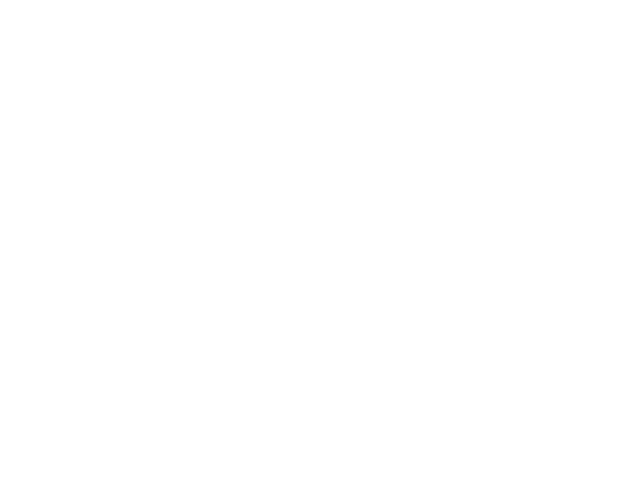

In [39]:
q_do, q_ik_dmp, q_dmp, E_do, E_dmp, E_q_dmp=rb_dmp_R(robot, q_do, random_e=0.01)
fig = plt.figure('E')

ax = fig.add_subplot(111, projection='3d')

ax.plot(E_do[:,0],E_do[:,1],E_do[:,2],'g', label='E_do')
ax.plot(E_dmp[:,0],E_dmp[:,1],E_dmp[:,2], 'r',label='E_dmp')
ax.plot(E_q_dmp[:,0],E_q_dmp[:,1],E_q_dmp[:,2],'b', label='E_q_dmp')
ax.legend()
    

<IPython.core.display.Javascript object>


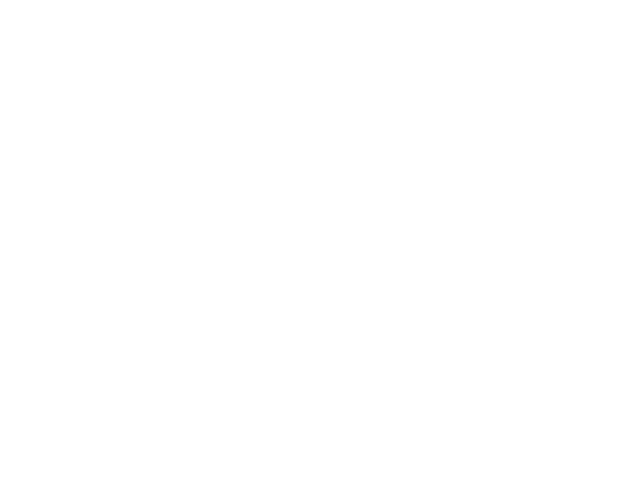

<function matplotlib.pyplot.show(block=None)>

In [40]:
fig = plt.figure('q error')

plt.plot(range(len(q_dmp)),(q_dmp - q_ik_dmp), label=['q1','q2','q3','q4','q5'])
plt.legend()
plt.show

<IPython.core.display.Javascript object>


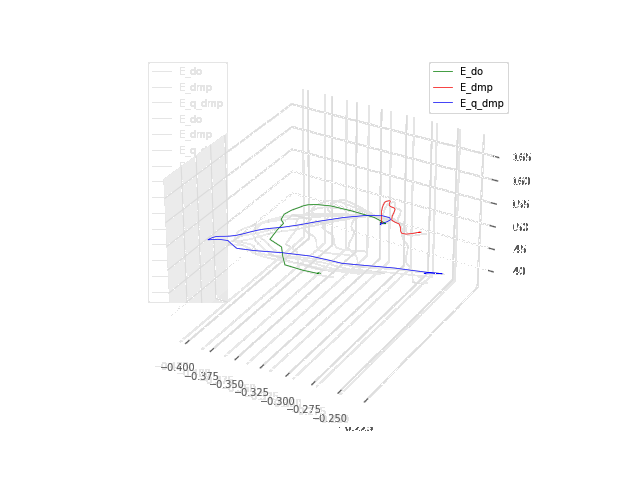

In [41]:
fig = plt.figure('q dmp')
plt.plot(range(len(q_dmp)),q_dmp , label=['q1','q2','q3','q4','q5'])
plt.legend()


<IPython.core.display.Javascript object>


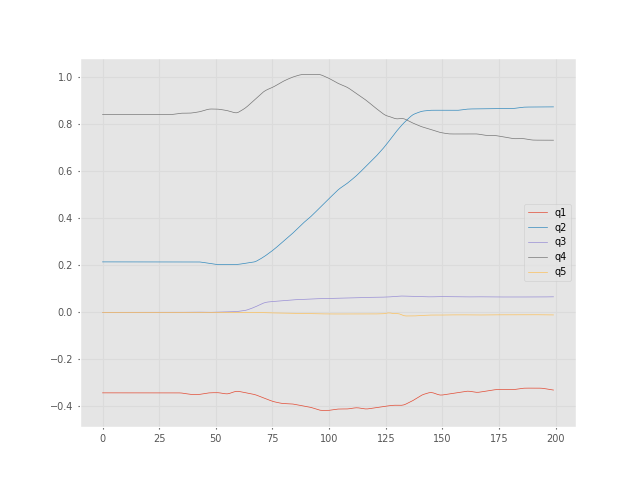

In [29]:
fig = plt.figure('q_ik dmp')
plt.plot(range(len(q_dmp)),q_ik_dmp , label=['q1','q2','q3','q4','q5'])
plt.legend()

In [30]:
q_dmp.shape

(200, 5)

In [31]:
Te=robot.fkine(q_do[-1,:])
robot.ikine_min(SE3(E_do.T[:,-1]+np.random.rand(3)*0.01) * SE3.RPY(Te.rpy()) ,q0=q_do[0,:]).q #q cuoi giai ik e_do cuoi

array([-0.31677435,  0.8925351 ,  0.04775278,  0.70732585, -0.00301884])

In [32]:
q_do, q_dmp, E_do, E_dmp, E_q_dmp=rb_dmp(robot, q_do)

TypeError: rb_dmp() missing 1 required positional argument: 'random_e'

In [ ]:
erorr=E_dmp-E_q_dmp
plt.plot(range(len(erorr)),erorr[:,0])
plt.show()

In [ ]:
import spatialmath.base.symbolic as sym

In [ ]:
q=[q1,q2,q3,q4,q5]
dq=[dq1,dq2,dq3,dq4,dq5]
ddq=[ddq1,ddq2,ddq3,ddq4,ddq5]

In [ ]:
q = sym.symbol('q_1:6')
dq=sym.symbol('dq_1:6')
ddq=sym.symbol('ddq_1:6')

In [ ]:
tau = robot.rne_python(q, dq, ddq)

In [36]:
n = int(input())
arr = map(int, input().split())
print(sorted(list(set(arr))[-1]))

5
1


TypeError: 'int' object is not iterable

In [40]:
a= [1, 2,5,6,6]
sorted(set(a))[-2]

5